In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
sns.set()

In [3]:
data = defaultdict(list)
sizes = []
time = 0
rss = 0
ds_type = None
threads = 0
file_count = 0
with open("exp.txt") as in_f:
    for line in in_f:
        if "CBL/target/release" in line:
            ds_type = "CBL"
            threads = 1
            file_count = int(line.split("/")[-1].split(".")[0])
        elif "bufboss/bin/" in line:
            ds_type = "Bufboss"
        elif "bifrost/build/bin" in line:
            ds_type = "Bifrost"
        elif "BBB/build/bin" in line:
            ds_type = "BSBWT"
        elif line.startswith("threads = "):
            threads = int(line.split()[-1])
        elif "maxresident" in line:
            for field in line.split():
                if "elapsed" in field:
                    f_s = field[:-7].split(':')
                    time = int(f_s[-2]) * 60 + float(f_s[-1])
                    if len(f_s) > 2:
                        time += int(f_s[0]) * 60 * 60
                elif "maxresident" in field:
                    rss = int(field[:-13])
                    rss /= 1024
                    data[f"{ds_type}-{threads}"].append((time, rss))
        elif line.startswith("Saw "):
            elems = int(line.split()[1]) // 2
            if (threads == 1):
                sizes.append(elems)
            

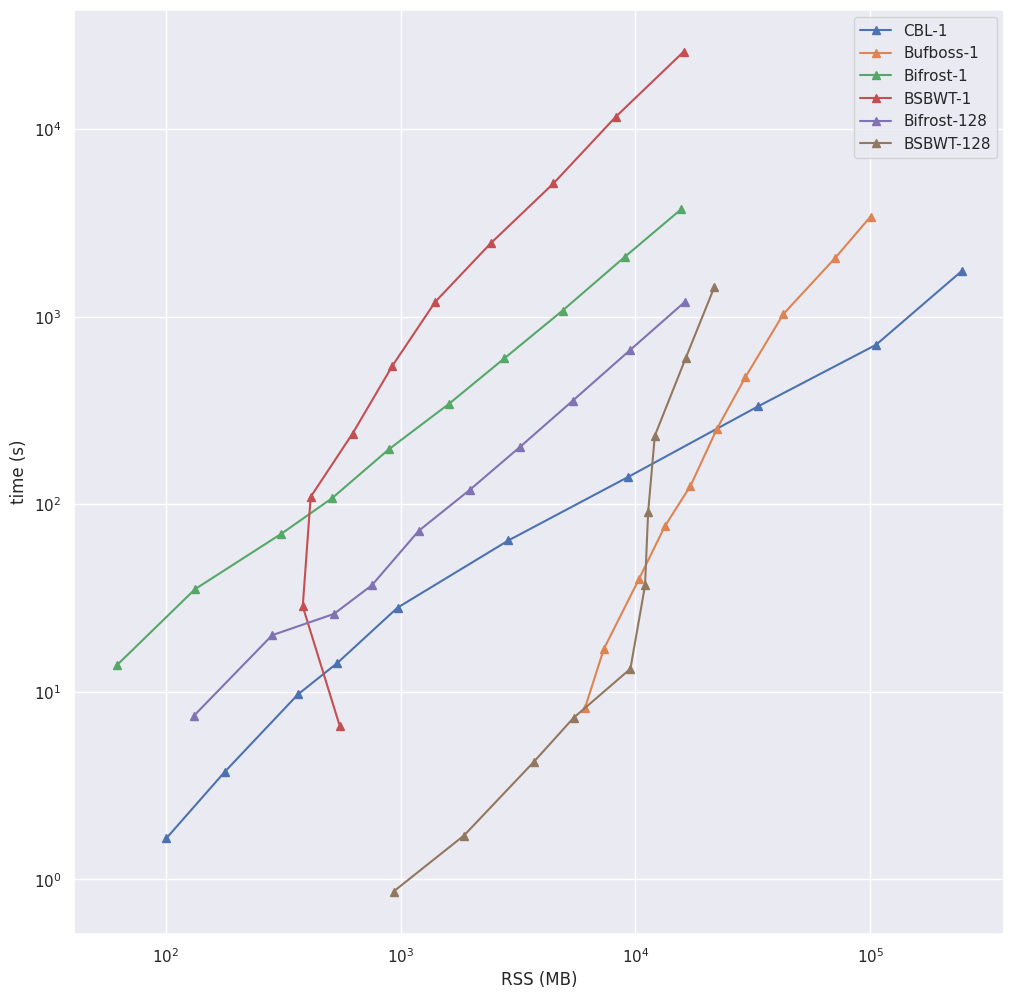

In [4]:
plt.figure(figsize=(12, 12))
for k, v in data.items():
    plt.plot([vv[1] for vv in v], [vv[0] for vv in v], label=k, marker="^")
plt.ylabel("time (s)")
plt.xlabel("RSS (MB)")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

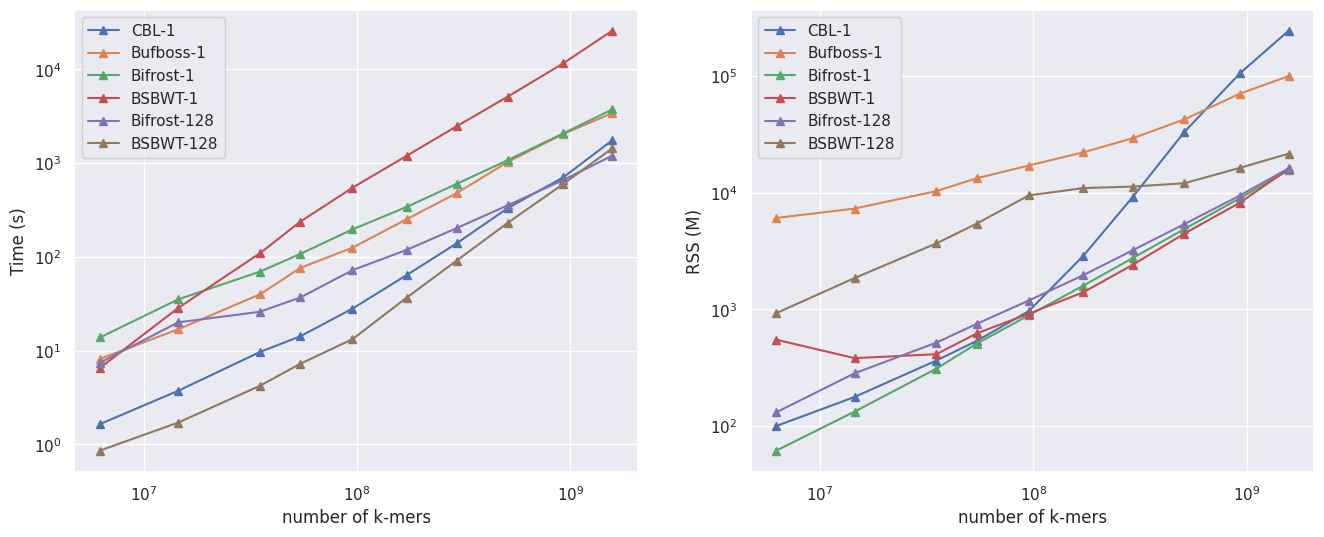

In [6]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for k, v in data.items():
    plt.plot(sizes, [vv[0] for vv in v], label=k, marker="^")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("number of k-mers")
plt.ylabel("Time (s)")
plt.legend()
plt.subplot(1, 2, 2)
for k, v in data.items():
    plt.plot(sizes, [vv[1] for vv in v], label=k, marker="^")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("number of k-mers")
plt.ylabel("RSS (M)")
plt.legend()
plt.show()

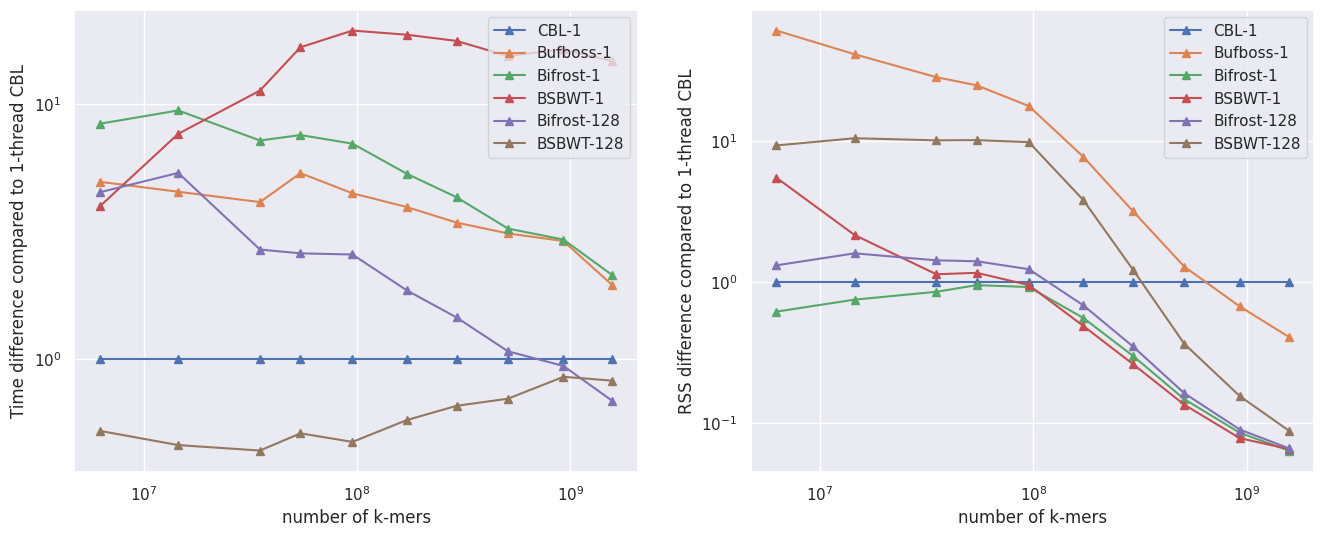

In [10]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
c_t, c_l = "CBL", "1"
control = data[f"{c_t}-{c_l}"]
for k, v in data.items():
    plt.plot(sizes, [vv[0] / cc[0] for cc, vv in zip(control, v)], label=k, marker="^")
plt.xlabel("number of k-mers")
plt.ylabel(f"Time difference compared to {c_l}-thread {c_t}")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.subplot(1, 2, 2)
for k, v in data.items():
    plt.plot(sizes, [vv[1] / cc[1] for cc, vv in zip(control, v)], label=k, marker="^")
plt.xlabel("number of k-mers")
plt.ylabel(f"RSS difference compared to {c_l}-thread {c_t}")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()